# Sentiment Analysis of Product Reviews

This project analyzes sentiment in 15,000 online product reviews, using natural language processing and machine learning to classify reviews as positive or negative. The main steps include data preprocessing, exploratory data analysis, model training, and evaluation.


In [227]:
import string
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist

from wordcloud import WordCloud
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

## 1. Loading and Exploring the Dataset

Here, we load the data, observe its structure, check for any duplicates, and clean it to prepare for analysis.


In [228]:
df = pd.read_csv('reviews.csv')
df.head()

,Sentiment,Review
0,Positive,This is the wonderfully engaging tale of how B...
1,Positive,Charles Manson is part of the American conscie...
2,Positive,Helter Skelter motive is a little far out. Rea...
3,Negative,what permissive issues could ban all photos......
4,Positive,I was 16 years old the summer of 1969 and reme...


In [229]:
df.shape

(15001, 2)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15001 entries, 0 to 15000
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  15001 non-null  object
 1   Review     15001 non-null  object
dtypes: object(2)
memory usage: 234.5+ KB


In [231]:
df.duplicated().sum()

5

In [232]:
df.drop_duplicates(inplace=True)

In [233]:
df.Sentiment.value_counts()

Sentiment
Positive    7948
Negative    7048
Name: count, dtype: int64

## 2. Data Cleaning and Preprocessing

Steps:
- Convert text to lowercase
- Remove punctuation
- Filter out stopwords
- Map sentiment labels to numerical values


In [234]:
df['Review'] = df['Review'].str.lower()

In [235]:
df['Review'] = df['Review'].str.translate(str.maketrans('', '', string.punctuation)).str.split().str.join(' ')

In [236]:
stop_words = set(stopwords.words('english'))
stop_words.update(['im', 'would', 'your', 'every', 'thing', 'cant', 'dont', 'doesnt', 'also', 'get'])
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

In [237]:
df['label'] = df['Sentiment'].map({'Positive': 1, 'Negative': 0})

In [238]:
positive_reviews = ' '.join(df[df['label'] == 1]['Review']).split()
negative_reviews = ' '.join(df[df['label'] == 0]['Review']).split()

In [239]:
freq_dist = FreqDist(positive_reviews)
pos_word_counts = dict(freq_dist.most_common(20))

## 3. Exploratory Data Analysis (EDA)

Visualize data distribution, common words, and review length to better understand the data and gain insights into the most frequently used terms in positive and negative reviews.


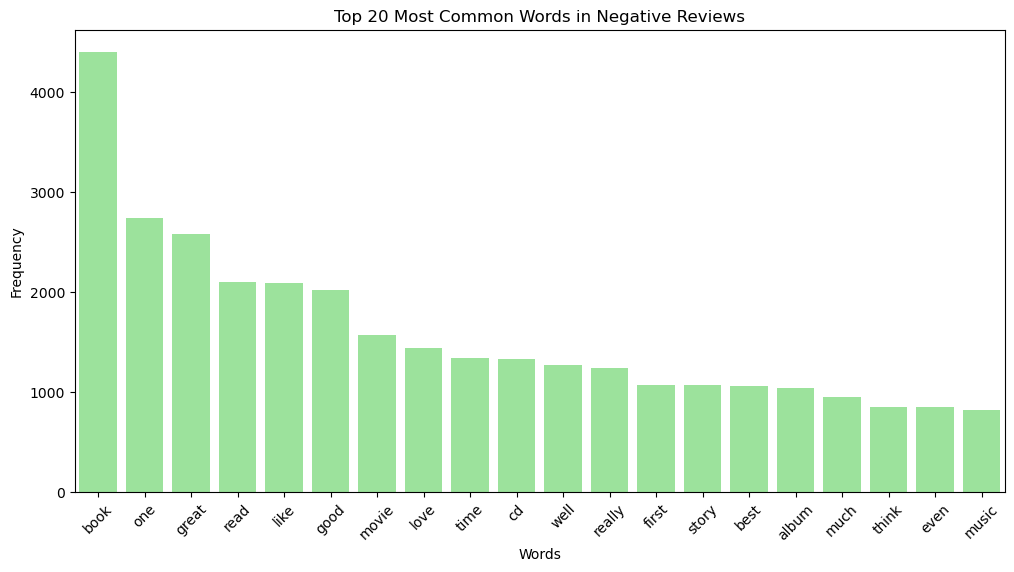

In [240]:
plt.figure(figsize=(12, 6))
sns.barplot(x=range(len(pos_word_counts)), y=list(pos_word_counts.values()), color="lightgreen")
plt.xticks(range(len(pos_word_counts)), list(pos_word_counts.keys()), rotation=45)
plt.title("Top 20 Most Common Words in Negative Reviews")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [241]:
freq_dist = FreqDist(negative_reviews)
neg_word_counts = dict(freq_dist.most_common(20))

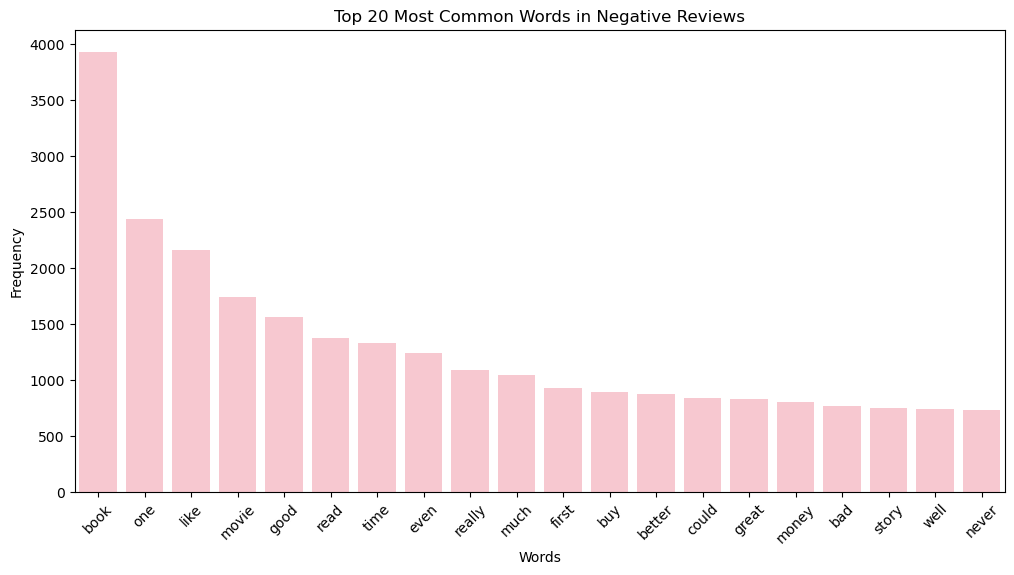

In [242]:
plt.figure(figsize=(12, 6))
sns.barplot(x=range(len(neg_word_counts)), y=list(neg_word_counts.values()), color="pink")
plt.xticks(range(len(neg_word_counts)), list(neg_word_counts.keys()), rotation=45)
plt.title("Top 20 Most Common Words in Negative Reviews")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [243]:
nltk.download('tagsets')
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets to /home/elsayed/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [244]:
def extarct_adj(words):
    adjectives = []
    for x in words:
        if x[1] in ['JJ', 'JJR', 'JJS']:
            adjectives.append(x[0])
    return adjectives

In [245]:
pos_tagger = nltk.pos_tag(positive_reviews)
pos_adjectives = extarct_adj(pos_tagger)

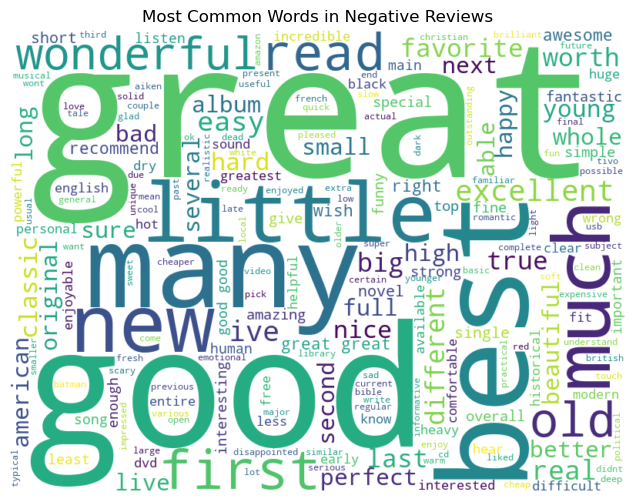

In [246]:
pos_adjectives = ' '.join(pos_adjectives)

word_cloud = WordCloud(width = 800, height = 600, background_color = 'white').generate(pos_adjectives)

plt.figure(figsize=(12, 6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Negative Reviews')
plt.show()

In [247]:
neg_tagger = nltk.pos_tag(negative_reviews)
neg_adjectives = extarct_adj(neg_tagger)

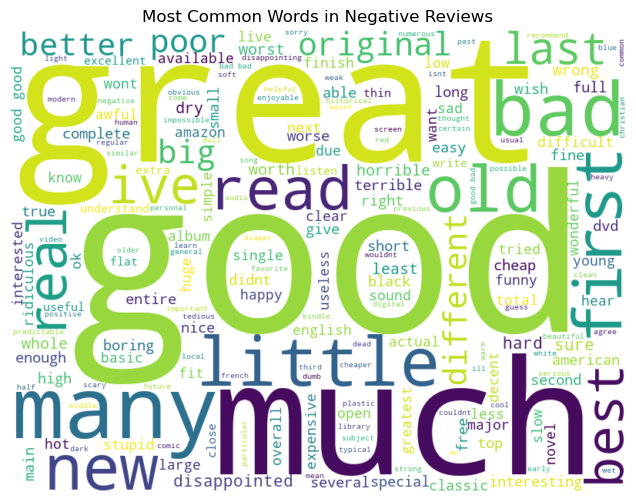

In [248]:
neg_adjectives = ' '.join(neg_adjectives)

word_cloud = WordCloud(width = 800, height = 600, background_color = 'white').generate(neg_adjectives)

plt.figure(figsize=(12, 6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Negative Reviews')
plt.show()

In [249]:
df['word_count'] = df['Review'].apply(lambda x: len(x.split()))

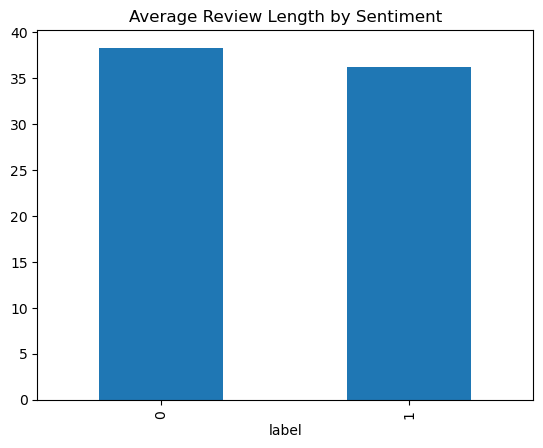

In [250]:
df.groupby('label')['word_count'].mean().plot(kind='bar', title='Average Review Length by Sentiment');

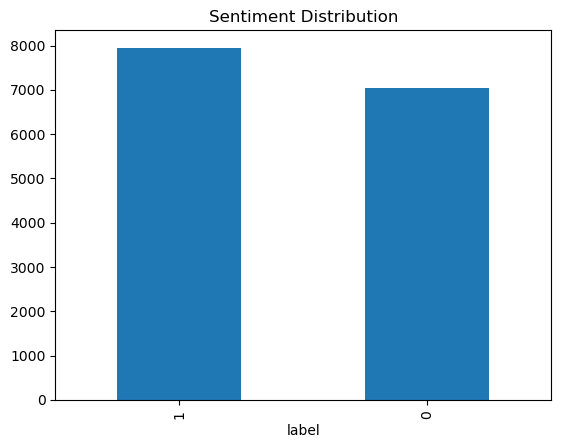

In [251]:
df['label'].value_counts().plot(kind='bar', title='Sentiment Distribution');

In [252]:
df.word_count.max()

135

## 4. Preprocessing and Data Splitting

Tokenizing and padding sequences, setting up features, and splitting the dataset into training, validation, and testing sets.

In [253]:
def preprocessing(data, text, max_words=10000, max_len=135, tokenizer=None):
    
    if tokenizer is None:
        tokenizer = tf.keras.preprocessing.text.Tokenizer(
            num_words=max_words,
            oov_token='<OOV>'
        )
        tokenizer.fit_on_texts(data[text])
    
    sequences = tokenizer.texts_to_sequences(data[text])
    padded = tf.keras.preprocessing.sequence.pad_sequences(
        sequences,
        maxlen=max_len,
        padding='post',
        truncating='post'
    )
    
    return padded, data['label'], tokenizer

In [254]:
X, y, tokenizer = preprocessing(df, 'Review')

In [255]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.1, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## 5. Model Building

Build a deep learning model using TensorFlow’s Sequential API. The model includes embedding, bidirectional LSTM, dropout, and dense layers to classify reviews based on sentiment.


In [256]:
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(len(tokenizer.word_index) + 1, 128),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        tf.keras.layers.Dropout(0.9),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

In [257]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 6. Model Compilation and Training

Compile the model with an appropriate optimizer and loss function for binary classification. Then, train the model on the training dataset while validating on a separate validation set.


In [258]:
model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
)

In [259]:
history = model.fit(
    X_train, y_train,
    epochs=2,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/2
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.5382 - loss: 3.1015 - val_accuracy: 0.8160 - val_loss: 0.4974
Epoch 2/2
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.8029 - loss: 0.4907 - val_accuracy: 0.8187 - val_loss: 0.4504


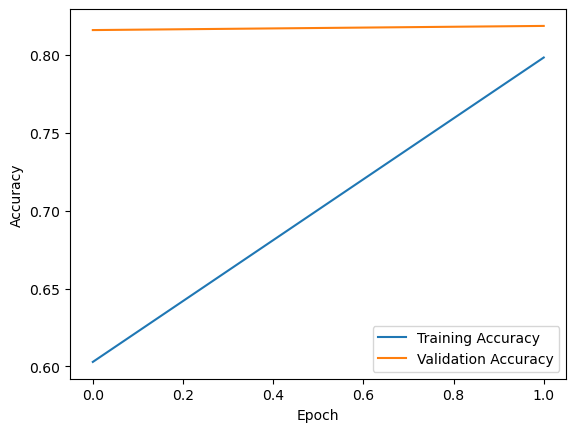

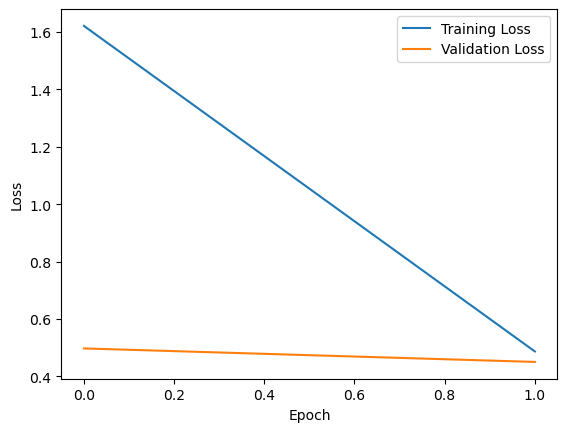

In [260]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

## 7. Model Evaluation

Evaluate the model's performance on the test set using metrics such as accuracy, confusion matrix, and classification report.

In [261]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8379 - loss: 0.4543
Test Loss: 0.4621315598487854
Test Accuracy: 0.8240000009536743


In [262]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


In [263]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       356
           1       0.82      0.85      0.84       394

    accuracy                           0.82       750
   macro avg       0.82      0.82      0.82       750
weighted avg       0.82      0.82      0.82       750



In [264]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
cm

array([[283,  73],
       [ 59, 335]])

<Figure size 800x600 with 0 Axes>

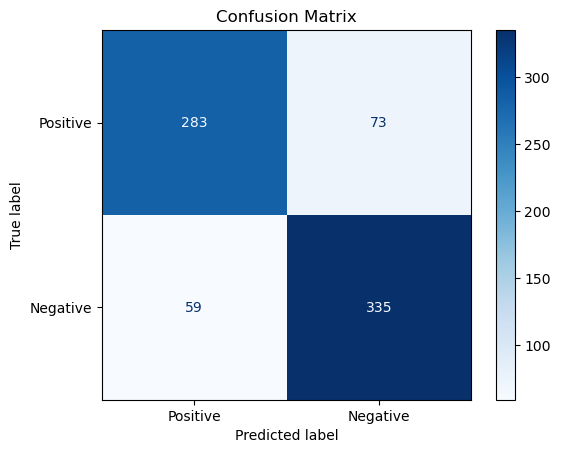

In [265]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Negative'])
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

## 8. Predicting Sentiment for New Text

A function to predict sentiment on new reviews using the trained model. This helps test the model's real-world applicability.


In [266]:
def predict_sentiment(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded = tf.keras.preprocessing.sequence.pad_sequences(sequence, maxlen=200, padding='post')
    prediction = model.predict(padded)
    return prediction

In [267]:
test_sentence = "that is a great product"
(predict_sentiment(test_sentence) > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


array([[1]])

## 11. Model Saving and Conclusion

Save the trained model for future use, and summarize the findings and insights gained from the sentiment analysis.


In [ ]:
# import pickle
# with open ('sentiment_analysis.pkl', 'wb')as f:
#     pickle.dump(model, f)